In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\Romek\\Downloads\\Export Trade History-2022-12-03 12_29_39.xlsx")

C:\Users\Romek\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df

,Date(UTC),Market,Type,Price,Amount,Total,Fee,Fee Coin
0,2022-12-03 11:22:25,BTCUSDT,BUY,16928.49,0.00060,10.157094,0,BNB
1,2022-12-03 11:20:51,BTCUSDT,SELL,16941.49,0.00060,10.164894,0,BNB
2,2022-12-03 11:18:26,BTCUSDT,SELL,16928.49,0.00060,10.157094,0,BNB
3,2022-12-03 11:13:32,BTCUSDT,BUY,16915.49,0.00060,10.149294,0,BNB
4,2022-12-03 11:12:49,BTCUSDT,SELL,16928.49,0.00239,40.459091,0,BNB
...,...,...,...,...,...,...,...,...
269,2022-12-02 11:29:34,BTCUSDT,BUY,16983.53,0.00060,10.190118,0,BNB
270,2022-12-02 11:29:15,BTCUSDT,BUY,16996.00,0.00239,40.620440,0,BNB
271,2022-12-02 11:29:07,BTCUSDT,SELL,16993.84,0.00060,10.196304,0,BNB
272,2022-12-02 11:29:07,BTCUSDT,SELL,16980.84,0.00060,10.188504,0,BNB


In [4]:
df = df[df.Amount == 0.0006]

#### How many buy how many sell

In [5]:
df['Type'].value_counts()

SELL    135
BUY     115
Name: Type, dtype: int64

#### Avarage buy and average sell

In [6]:
buy = df[df.Type == 'BUY']
buy_mean = buy.Price.mean()
buy_mean

16988.93660869565

In [7]:
sell = df[df.Type == 'SELL']
sell_mean = sell.Price.mean()
sell_mean

16999.927185185163

In [8]:
# df = df.head(10)

In [9]:
buy_count = 0
sell_count = 0

buy_list = []
sell_list = []

profit_total_list = []


for index, row in df.iterrows():
    
    if row['Type'] == 'BUY':
        buy_date = row['Date(UTC)']
        buy = row['Type'] 
        price = row['Price']
        amount = row['Amount']
        total = row['Total']
        content = [buy_date, buy, price, amount, total]
        buy_list.append(content)
        buy_count += 1
        
    if row['Type'] == 'SELL':
        sell_date = row['Date(UTC)']
        sell = row['Type'] 
        price = row['Price']
        amount = row['Amount']
        total = row['Total']
        content = [sell_date, sell, price, amount, total]
        sell_list.append(content)
        sell_count += 1
        
    print(f'buy list: {len(buy_list)} sell_list: {len(sell_list)}')

    while len(buy_list) > 0 and len(sell_list) > 0:
        buy_transaction = buy_list[0]
        sell_transaction = sell_list[0]
        buy_total = buy_transaction[4]
        
        sell_total = sell_transaction[4]
        
        transaction_date = sell_transaction[0]
        profit_total = sell_total - buy_total
        profit_total = round(profit_total, 7)
        
        print(f'buy invest: {buy_total:.7f} sell income: {sell_total:.7f} total profit = {profit_total:.7f}')
        
        content = [transaction_date, profit_total]
        profit_total_list.append(content)
        
        buy_list.pop(0)
        sell_list.pop(0)

buy list: 1 sell_list: 0
buy list: 1 sell_list: 1
buy invest: 10.1570940 sell income: 10.1648940 total profit = 0.0078000
buy list: 0 sell_list: 1
buy list: 1 sell_list: 1
buy invest: 10.1492940 sell income: 10.1570940 total profit = 0.0078000
buy list: 1 sell_list: 0
buy list: 1 sell_list: 1
buy invest: 10.1481000 sell income: 10.1559000 total profit = 0.0078000
buy list: 1 sell_list: 0
buy list: 2 sell_list: 0
buy list: 3 sell_list: 0
buy list: 4 sell_list: 0
buy list: 4 sell_list: 1
buy invest: 10.1481000 sell income: 10.1793000 total profit = 0.0312000
buy list: 4 sell_list: 0
buy list: 5 sell_list: 0
buy list: 5 sell_list: 1
buy invest: 10.1559000 sell income: 10.1871000 total profit = 0.0312000
buy list: 4 sell_list: 1
buy invest: 10.1637000 sell income: 10.1793000 total profit = 0.0156000
buy list: 3 sell_list: 1
buy invest: 10.1715000 sell income: 10.1715000 total profit = 0.0000000
buy list: 3 sell_list: 0
buy list: 3 sell_list: 1
buy invest: 10.1715000 sell income: 10.1715000

In [10]:
profit_total_list

[['2022-12-03 11:20:51', 0.0078],
 ['2022-12-03 11:18:26', 0.0078],
 ['2022-12-03 11:07:29', 0.0078],
 ['2022-12-03 10:45:44', 0.0312],
 ['2022-12-03 09:46:12', 0.0312],
 ['2022-12-03 09:09:42', 0.0156],
 ['2022-12-03 09:01:35', 0.0],
 ['2022-12-03 08:47:15', 0.0],
 ['2022-12-03 08:46:00', -0.0156],
 ['2022-12-03 08:42:26', 0.0078],
 ['2022-12-03 08:28:35', 0.0234],
 ['2022-12-03 08:05:45', 0.0156],
 ['2022-12-03 07:45:52', 0.0156],
 ['2022-12-03 07:36:29', 0.0],
 ['2022-12-03 07:34:45', -0.0078],
 ['2022-12-03 06:57:39', 0.0156],
 ['2022-12-03 06:23:47', 0.039],
 ['2022-12-03 06:23:45', 0.0234],
 ['2022-12-03 06:21:04', 0.0078],
 ['2022-12-03 06:15:41', 0.0],
 ['2022-12-03 06:11:14', 0.0078],
 ['2022-12-03 04:18:34', 0.032406],
 ['2022-12-03 03:01:00', 0.048006],
 ['2022-12-03 02:21:30', 0.048006],
 ['2022-12-03 02:01:53', 0.055806],
 ['2022-12-03 01:47:14', 0.0234],
 ['2022-12-03 01:18:11', 0.0078],
 ['2022-12-03 01:12:00', 0.0078],
 ['2022-12-03 00:22:41', 0.0312],
 ['2022-12-03 00:

In [11]:
df = pd.DataFrame(profit_total_list)
columns = ['Date', 'profit_[USDT]' ]
df.columns = columns
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index()
df['cumulative_profit_[USDT]'] = df['profit_[USDT]'].cumsum()

df

,profit_[USDT],cumulative_profit_[USDT]
Date,,
2022-12-02 13:02:28,0.053562,0.053562
2022-12-02 13:02:29,0.061362,0.114924
2022-12-02 13:03:58,0.045762,0.160686
2022-12-02 13:06:51,0.022362,0.183048
2022-12-02 13:07:53,0.053562,0.236610
...,...,...
2022-12-03 09:46:12,0.031200,0.490398
2022-12-03 10:45:44,0.031200,0.521598
2022-12-03 11:07:29,0.007800,0.529398


<AxesSubplot:xlabel='Date'>

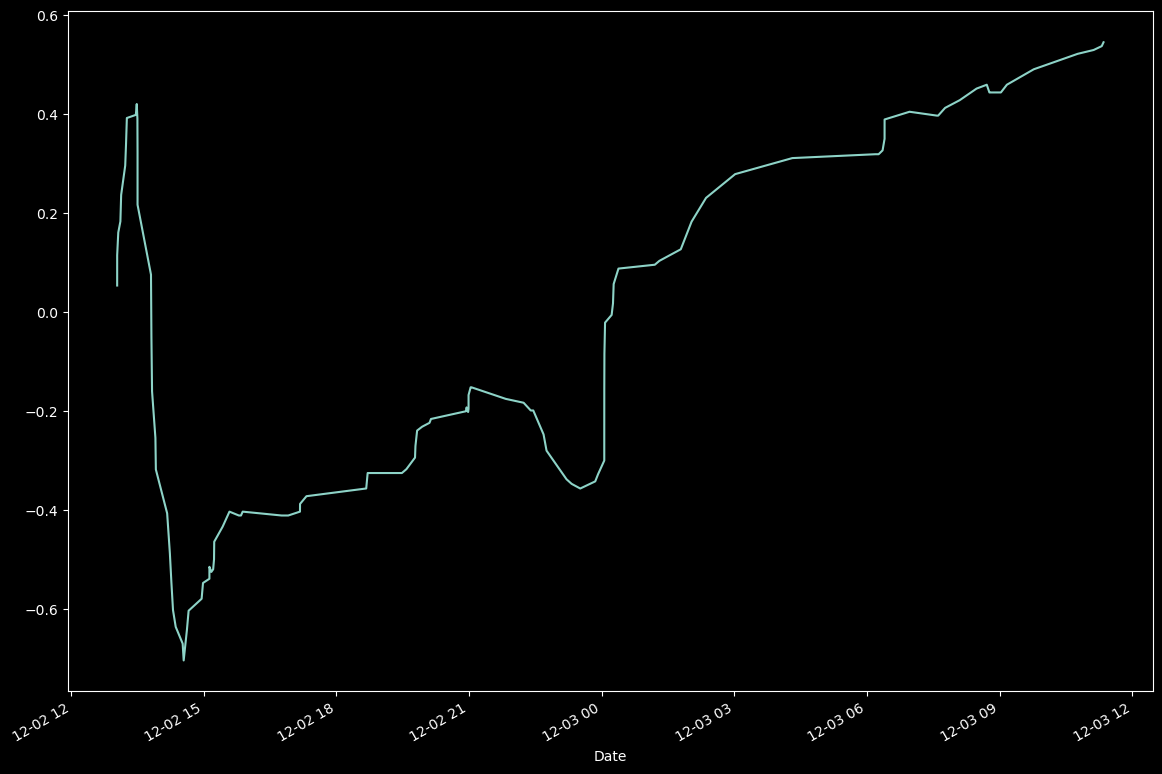

In [12]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (14, 10)
df['cumulative_profit_[USDT]'].plot()